<a href="https://colab.research.google.com/github/fagr5863/RESOLMEX_CODE/blob/main/JUL2023_RESOLMEX_TEP08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
from math import pi
from datetime import datetime
from matplotlib.backends.backend_pdf import PdfPages
from pandas.plotting import table
#from pyplot import hist
import matplotlib.dates as mdates
from dateutil.parser import parse
import matplotlib.colors as mcolors
#hist(date2num(list_of_dates), cumulative=True)
import locale
# Idioma "es-ES" (código para el español de España)
#locale.setlocale(locale.LC_ALL, 'es-MX')
#plt.rcParams['font.sans-serif'] = ['Bierstadt']

In [ ]:
  df = pd.read_excel('JUL2023.xlsx',sheet_name='JUL2023',index_col=0,parse_dates=True)                      # Para leer  un archivo xls
  #df = df.rename(columns={"TIMESTAMP":"datetime"})      # Renombrar el encabezado de la columna TIMESTAMP por datetime para que lo detecte como fecha
  #df["datetime"].min(),df["datetime"].max()             # Muestra la fecha incial y final de la tabla importada
  df["GLOBHORZ_Avg"].min(),df["GLOBHORZ_Avg"].max()     # Muestra el valor mínimo y máximo de la variable seleccionada

(-6.555203, 1488.984)

In [ ]:
  df["GLOBHORZ_Avg"].count() # Devuelve el número de valores en la variable seleccionada

44637

In [ ]:
  df.head(5)  # Muestra la tabla con el número de filas entre ()

,RECORD,ZenDeg,AzDeg,AirMass,CRBattVolt_Avg,CRPTemp_Avg,ProcessTime_s_Max,DNI_Avg,DH_IRCOR_Avg,DIFFHORZ_Avg,...,NSIGNAL_Avg,ESIGNAL_Avg,SSIGNAL_Avg,WSIGNAL_Avg,PARSIGNAL_Avg,GILLSIGNAL_Avg,DILLSIGNAL_Avg,UVSIGNAL_Avg,DWSIGNAL_Avg,UWSIGNAL_Avg
TIMESTAMP,,,,,,,,,,,,,,,,,,,,,
2023-07-01 00:00:00,2137243,135.3824,358.898000,-99.99,13.18,22.87,2.084,-99.99,0.535378,0.063739,...,-0.000116,-2.858120,-0.000149,-0.000182,-0.030392,-0.007730,-0.007168,0.000177,-237.0760,-99.99
2023-07-01 00:01:00,2137244,135.3862,359.224200,-99.99,13.18,22.87,2.085,-99.99,0.506015,0.029995,...,-0.000199,-2.729176,-0.000199,-0.000199,-0.006257,-0.002748,-0.001076,0.000140,-239.2779,-99.99
2023-07-01 00:02:00,2137245,135.3887,359.551500,-99.99,13.18,22.87,2.084,-99.99,0.357575,-0.058115,...,-0.000248,-0.526941,-0.000248,-0.000281,-0.024846,0.000033,0.000463,0.000144,-208.9519,-99.99
2023-07-01 00:03:00,2137246,135.3898,359.879700,-99.99,13.18,22.87,2.084,-99.99,0.206522,-0.110605,...,-0.000215,-1.529989,-0.000166,-0.000182,0.001589,0.000679,0.002020,0.000164,-159.4084,-99.99
2023-07-01 00:04:00,2137247,135.3896,0.210288,-99.99,13.18,22.87,2.084,-99.99,0.151171,-0.089984,...,-0.000116,-2.399998,-0.000166,-0.000199,0.022314,-0.000066,0.003559,0.000160,-121.2199,-99.99


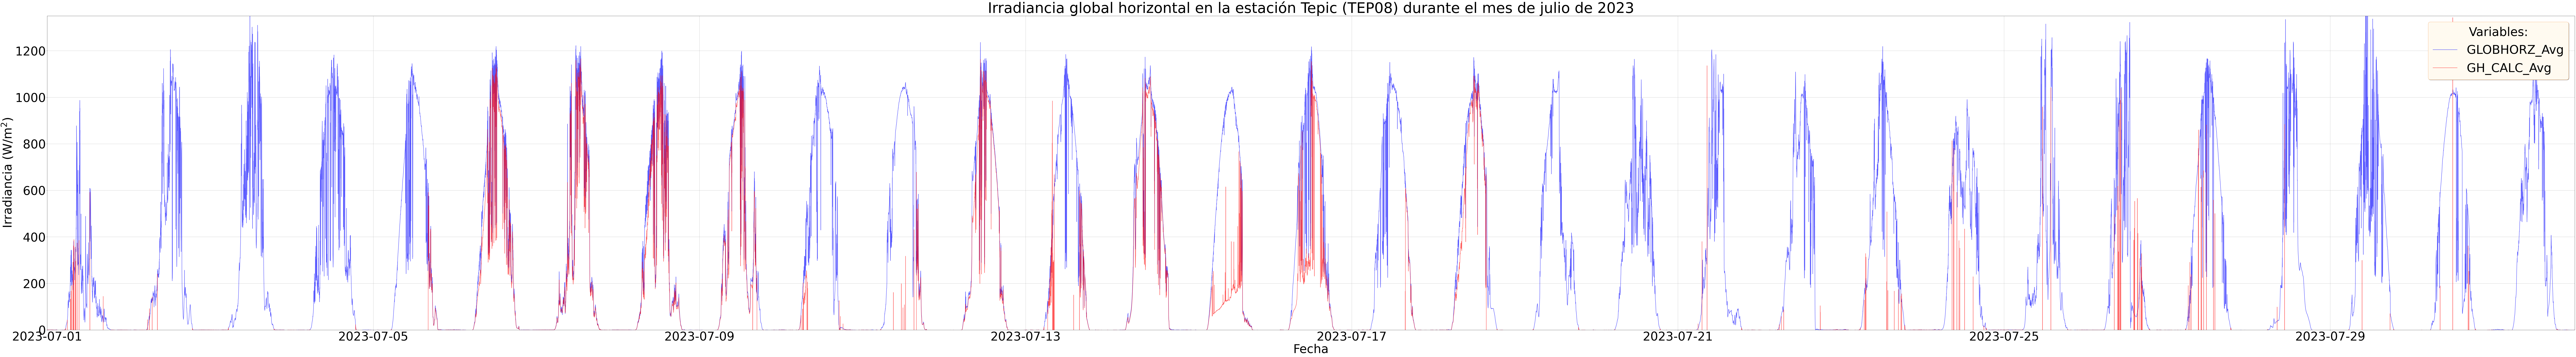

In [ ]:

  fecha1 = parse('2023-07-01 00:00:00')
  fecha2 = fecha1 + pd.Timedelta('31d')
  fecha3 = parse('2023-07-31 23:59:00')

  rango = [fecha1,fecha3]

  H = np.sum(df.GLOBHORZ_Avg)/60000
  #np.sum(AVG_6)/60000
  H_s= str(round(H, 2))

  limite1 = 0
  limite2 = 1350

  plt.rcParams.update({'font.size': 64})
  fig, ax = plt.subplots(figsize=(240,30))
  ax.plot(df.GLOBHORZ_Avg ,color='blue', linestyle='-', linewidth=2, alpha=.65, label = "GLOBHORZ_Avg") #Irradiación global horizontal: "+ H_s + " kWh/m$^{2}$
  ax.plot(df.GH_CALC_Avg ,color='red', linestyle='-', linewidth=2, alpha=.65, label = "GH_CALC_Avg")
  ax.set_xlim(fecha1,fecha3)
  ax.set_ylim(limite1,limite2)
  ax.grid(True)
  plt.xlabel("Fecha")
  plt.ylabel("Irradiancia (W/m$^{2}$)")
  plt.legend(title="Variables:", shadow=True, facecolor="floralwhite", edgecolor="SandyBrown",loc=1)
  plt.title("Irradiancia global horizontal en la estación Tepic (TEP08) durante el mes de julio de 2023")
  plt.savefig('IRjul_2023.pdf',format='pdf', dpi=9600, transparent=True, bbox_inches='tight')

# Nueva sección

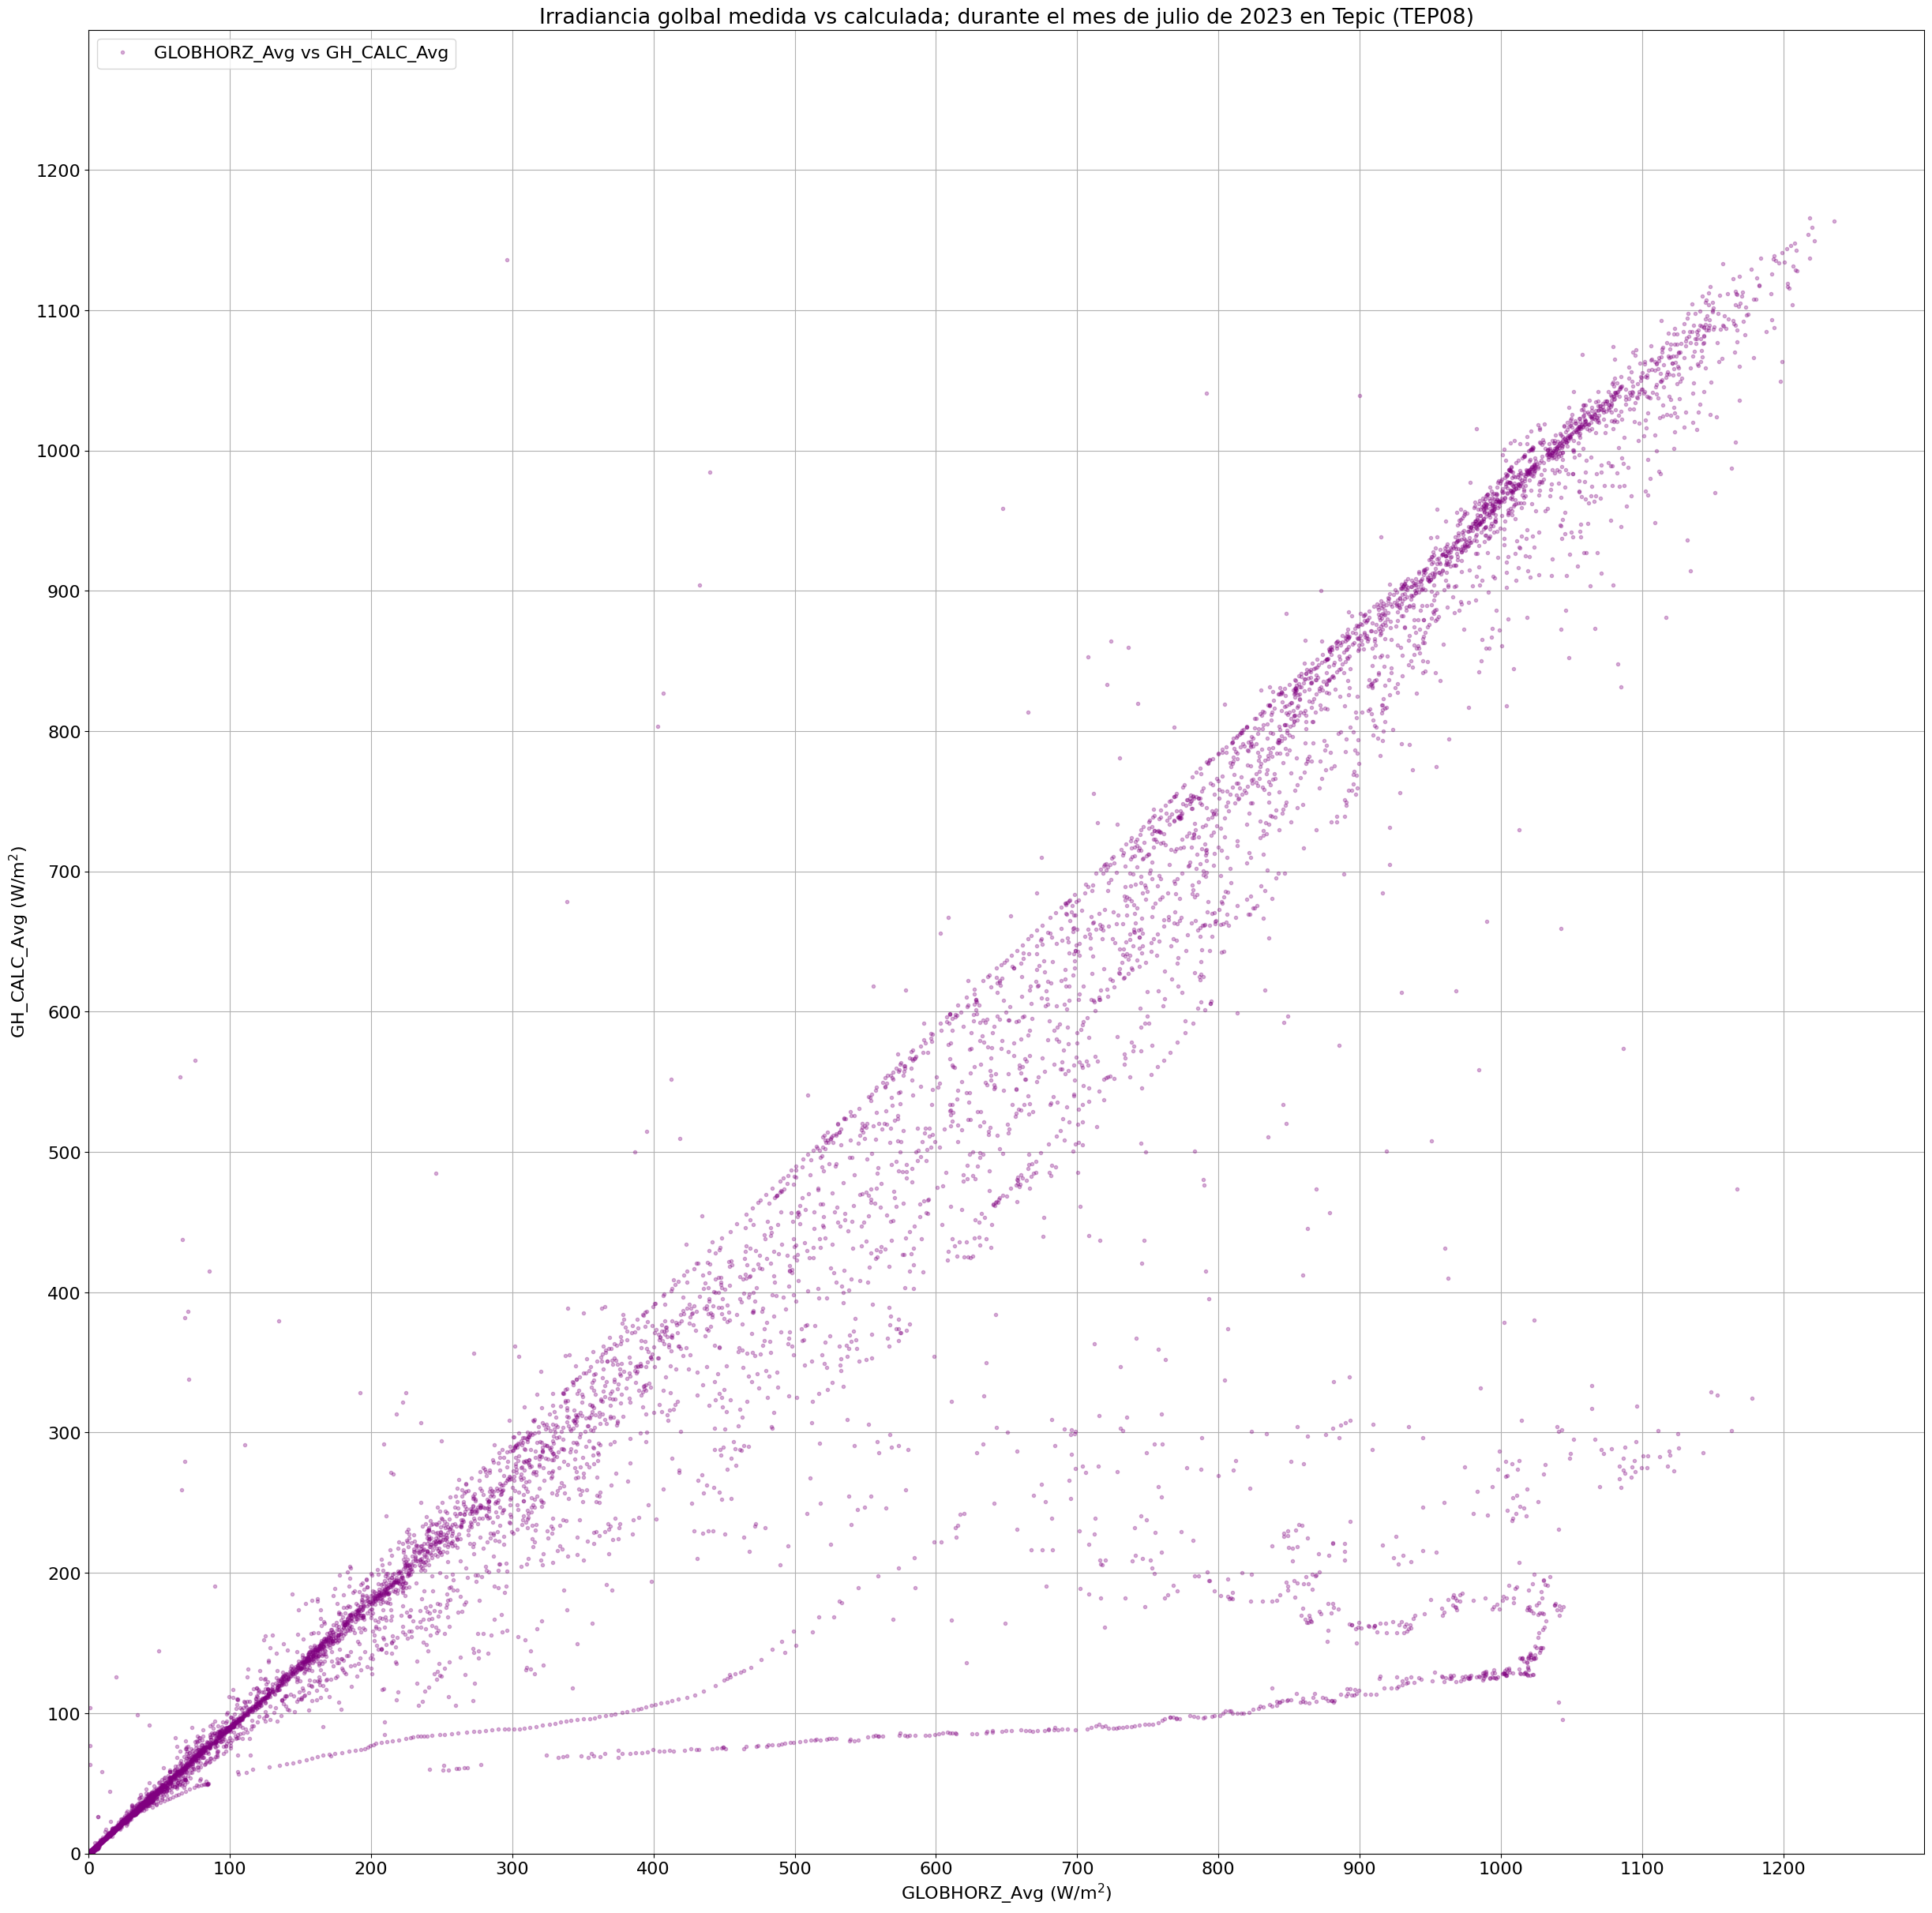

In [ ]:
  fecha1 = parse('2023-07-01 00:00:00')
  fecha2 = fecha1 + pd.Timedelta('31d')
  fecha3 = parse('2023-07-31 23:59:00')

rango = [fecha1,fecha3]

plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(30,30))
#t= df.datetime
f1= df.GLOBHORZ_Avg
f2= df.GH_CALC_Avg
plt.plot(f1,f2,'.',color='purple', alpha=0.3)
plt.axis([0,1300,0,1300])
mx=(np.arange(0,1300,100,int))
plt.xticks(mx)
plt.yticks(mx)
plt.xlabel("GLOBHORZ_Avg (W/m$^{2}$)")
plt.ylabel("GH_CALC_Avg (W/m$^{2}$)")
plt.legend(("GLOBHORZ_Avg vs GH_CALC_Avg","GH_CALC_Avg"),loc=2)
plt.title("Irradiancia golbal medida vs calculada; durante el mes de julio de 2023 en Tepic (TEP08)")
plt.grid(True)  # Activa cuadrícula del gráfico pero no se muestra

plt.savefig('IRvsjul_2023.pdf',format='pdf', dpi=300, transparent=True, bbox_inches='tight')